In [12]:
import numpy as np

import tsplib95
import networkx as nx
from networkx.algorithms.approximation import christofides,

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp
import matplotlib.pyplot as plt




In [40]:
# read in graph instances/random_20_0.tsp
problem = tsplib95.load('Instances/random_20_0.tsp')
graph = problem.get_graph()
dist_matrix = nx.to_numpy_matrix(graph)
n = len(graph.nodes)
cities_matrix = np.zeros((n, 2))
for i in range(0, n):
    # ensure numpy matrix
    cities_matrix[i] = problem.get_display(i + 1)


In [41]:
def visualise(solution, cities, plot_title="TRP", filename="temp.png"):
    x = cities[:, 0]
    y = cities[:, 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='red')

    # Plot the solution path
    solution_x = x[solution]
    solution_y = y[solution]
    plt.plot(solution_x, solution_y, 'b-', linewidth=0.5)

    # Connect the last first cities, should not be needed as we're doing TRP instead of TSP, but it looks nicer
    plt.plot([solution_x[-1], solution_x[0]], [solution_y[-1], solution_y[0]], 'b-', linewidth=0.5)

    # Label each point with city index
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi, yi, str(i), color='black', ha='center', va='center')

    # Set plot title and labels
    plt.title(plot_title)

    plt.savefig(filename)
    plt.close()

In [42]:
# get TSP tour using nx
TSP = christofides(graph)
TSP.pop()
TSP = [x - 1 for x in TSP]
TSP


[0, 9, 14, 11, 12, 15, 10, 4, 16, 18, 1, 6, 5, 17, 13, 19, 7, 2, 3, 8]

In [43]:
# get the TRP tour using GILS
gilsrvnd_sol, gilsrvnd_cost, gilsrvnd_time = gilsrvnd.run("Instances/random_20_0.tsp")

In [45]:
visualise(gilsrvnd_sol, cities_matrix, "random_20_0 TRP Tour", "OptimalTRP.png")
visualise(TSP, cities_matrix, "random_20_0 TSP Tour", "OptimalTSP.png")

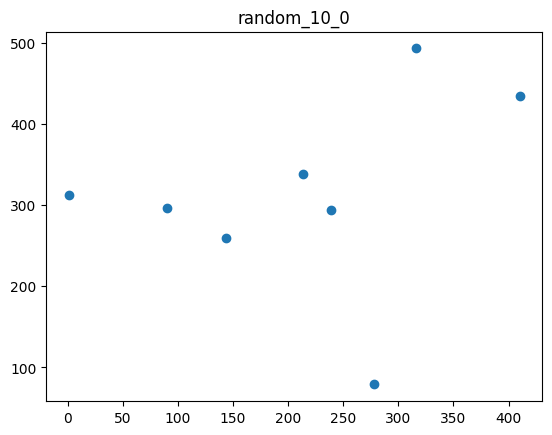

In [28]:
# plot bip_20_0.tsp
fn = "random_10_0.tsp"
with open('Instances/' + fn, 'r') as f:
    lines = f.readlines()
    points = []
    for line in lines[7:-1]:
        points.append([float(x) for x in line.split()[1:]])
    points = np.array(points)
    plt.scatter(points[:,0], points[:,1])
    plt.title(fn[:-4])
    plt.savefig('Images/'+ fn[:-4] + ".png")
    # save the image


In [15]:
# save the image
plt.savefig('bip_30_0.png')

<Figure size 640x480 with 0 Axes>

In [41]:
# find the minimum of the columns GILS_cost, DBMEA_cost, GRASP_cost, in case of a tie choose the column with the minimum time column
def findBest(row):
    cost_columns = ['GRASP_cost', 'GILS_cost', 'DBMEA_cost']
    min_cost = row[cost_columns].min()

    min_columns = row[[col for col in cost_columns if row[col] == min_cost]]

    if len(min_columns) == 1:
        return min_columns.index[0]
    else:
        time_columns = ["GRASP_time", "GILS_time", "DBMEA_time"]
        min_time = row[time_columns].min()
        min_time_columns = row[[col for col in time_columns if row[col] == min_time]]
        return min_time_columns.index[0]

In [42]:
matrix_all['min_method'] = matrix_all.apply(findBest, axis=1)

In [44]:
matrix_all["min_method"].value_counts()

min_method
DBMEA_cost    186
GILS_cost     121
GRASP_time     33
Name: count, dtype: int64

In [45]:
# save matrix_all as csv
#matrix_all.to_csv('matrix_good.csv', index=False)